   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


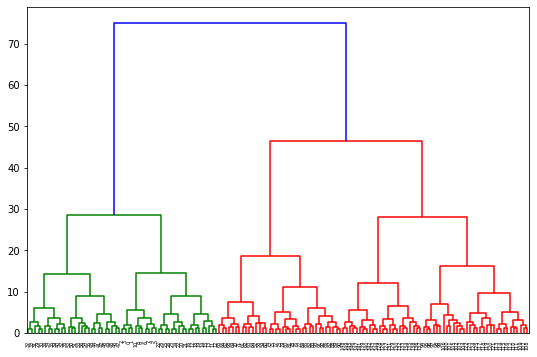

In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

iris_dataset = pd.read_csv('iris.csv')
print(iris_dataset.head())

#Drop column of species 
iris_dataset.drop('Species', axis = 1, inplace = True)

# Compute distance matrix
d = pdist(X=iris_dataset, metric="euclidean")

# Perform agglomerative hierarchical clustering
# Use 'average' link function
mdl = linkage(d, method='average')

# Plot resultant dendrogram
plt.figure(figsize=(9,6))
dendrogram(mdl)
plt.show()

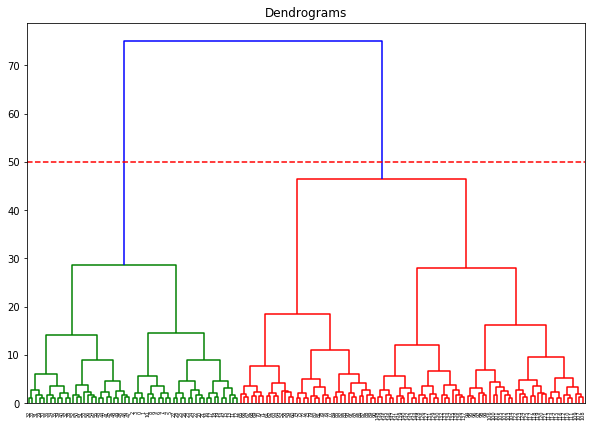

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(d, method='average'))
plt.axhline(y=50, color='r', linestyle='--')

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  

In [26]:
print(d)
d =d.reshape(-1, 1)
cluster.fit_predict(d)

[[1.13578167 2.06397674 3.06920185 ... 1.17473401 2.1        1.26095202]]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [40]:
# Naive bayes in iris dataset
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
iris_data = pd.read_csv('iris.csv')


In [41]:
#Replace Species type with numbers
iris_data = pd.read_csv('iris.csv')
iris_data.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)
clf = GaussianNB()

# Split-out validation dataset
array = iris_data.values
X = array[:,1:5]
Y = array[:,5]

# One-third of data as a part of test set
validation_size = 0.33

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [42]:
# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
clf.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
#Predicting for the Test Set
pred_clf = clf.predict(X_validation)

#Prediction Probability
prob_pos_clf = clf.predict_proba(X_validation)[:, 1]

In [44]:
#Create the prediction file by concatenation of the original data and predictions
#Reshaping needed to perform the concatenation
pred_clf_df = pd.DataFrame(pred_clf.reshape(50,1))
#Column renaming to indicate the predictions
pred_clf_df.rename(columns={0:'Prediction'}, inplace=True)

In [46]:
#reshaping the test dataset
X_validation_df = pd.DataFrame(X_validation.reshape(50,4))
print(X_validation_df)

      0    1    2    3
0   5.9  3.0  5.1  1.8
1   5.4  3.0  4.5  1.5
2   5.0  3.5  1.3  0.3
3   5.6  3.0  4.5  1.5
4   4.9  2.5  4.5  1.7
5   4.5  2.3  1.3  0.3
6   6.9  3.1  4.9  1.5
7   5.6  2.7  4.2  1.3
8   4.8  3.4  1.6  0.2
9   6.4  3.2  4.5  1.5
10  6.7  3.0  5.0  1.7
11  6.0  3.4  4.5  1.6
12  5.2  4.1  1.5  0.1
13  7.2  3.6  6.1  2.5
14  5.2  3.4  1.4  0.2
15  5.9  3.2  4.8  1.8
16  6.7  2.5  5.8  1.8
17  6.4  3.1  5.5  1.8
18  5.1  3.8  1.6  0.2
19  4.9  3.1  1.5  0.1
20  5.8  2.7  3.9  1.2
21  6.9  3.2  5.7  2.3
22  6.1  2.9  4.7  1.4
23  6.0  2.2  5.0  1.5
24  7.2  3.0  5.8  1.6
25  6.0  3.0  4.8  1.8
26  6.2  2.9  4.3  1.3
27  5.5  2.4  3.8  1.1
28  5.8  2.7  5.1  1.9
29  6.7  3.1  5.6  2.4
30  6.2  2.8  4.8  1.8
31  5.7  2.6  3.5  1.0
32  4.6  3.6  1.0  0.2
33  6.9  3.1  5.4  2.1
34  6.4  2.9  4.3  1.3
35  4.8  3.0  1.4  0.3
36  5.5  3.5  1.3  0.2
37  5.4  3.9  1.7  0.4
38  5.1  3.5  1.4  0.3
39  7.1  3.0  5.9  2.1
40  6.7  3.3  5.7  2.1
41  6.8  2.8  4.8  1.4
42  6.4  2.

In [47]:
#concatenating the two pandas dataframes over the columns to create a prediction dataset
pred_outcome = pd.concat([X_validation_df, pred_clf_df], axis=1, join_axes=[X_validation_df.index])
print(pred_outcome)

      0    1    2    3  Prediction
0   5.9  3.0  5.1  1.8         3.0
1   5.4  3.0  4.5  1.5         2.0
2   5.0  3.5  1.3  0.3         1.0
3   5.6  3.0  4.5  1.5         2.0
4   4.9  2.5  4.5  1.7         2.0
5   4.5  2.3  1.3  0.3         1.0
6   6.9  3.1  4.9  1.5         3.0
7   5.6  2.7  4.2  1.3         2.0
8   4.8  3.4  1.6  0.2         1.0
9   6.4  3.2  4.5  1.5         2.0
10  6.7  3.0  5.0  1.7         3.0
11  6.0  3.4  4.5  1.6         2.0
12  5.2  4.1  1.5  0.1         1.0
13  7.2  3.6  6.1  2.5         3.0
14  5.2  3.4  1.4  0.2         1.0
15  5.9  3.2  4.8  1.8         3.0
16  6.7  2.5  5.8  1.8         3.0
17  6.4  3.1  5.5  1.8         3.0
18  5.1  3.8  1.6  0.2         1.0
19  4.9  3.1  1.5  0.1         1.0
20  5.8  2.7  3.9  1.2         2.0
21  6.9  3.2  5.7  2.3         3.0
22  6.1  2.9  4.7  1.4         2.0
23  6.0  2.2  5.0  1.5         2.0
24  7.2  3.0  5.8  1.6         3.0
25  6.0  3.0  4.8  1.8         3.0
26  6.2  2.9  4.3  1.3         2.0
27  5.5  2.4  3.8  1

In [49]:
pred_outcome.rename(columns = {0:'SepalLengthCm', 1:'SepalWidthCm', 2:'PetalLengthCm', 3:'PetalWidthCm'}, inplace=True)

del iris_data['Id']

In [51]:
#merging the prediction with original dataset
pred_comp = pd.merge(iris_data,pred_outcome, on=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

#print top 10 lines of the final predictions
print((pred_comp).head(10))
print ("\n")

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species  \
0            5.4           3.9            1.7           0.4        1   
1            4.9           3.1            1.5           0.1        1   
2            4.9           3.1            1.5           0.1        1   
3            4.9           3.1            1.5           0.1        1   
4            4.8           3.4            1.6           0.2        1   
5            5.1           3.5            1.4           0.3        1   
6            4.6           3.6            1.0           0.2        1   
7            5.2           3.4            1.4           0.2        1   
8            4.7           3.2            1.6           0.2        1   
9            5.2           4.1            1.5           0.1        1   

   Prediction  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  
5         1.0  
6         1.0  
7         1.0  
8         1.0  
9         1.0  




In [60]:
#Save the file to csv
pred_comp.to_csv('Predictions.csv', sep=',')

In [61]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f" % ('Accuracy',results.mean())
print(msg)

Accuracy: 0.970000
